In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sys
from copy import copy, deepcopy

In [2]:
# # Load the Wine Dataset
df_wine = pd.read_csv("data/winemag-data-130k-v2.csv", encoding = 'utf8')

In [3]:
df_wine.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [4]:
#df_wine = df_wine.drop('points', 1)

In [5]:
print(df_wine.dtypes)

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object


In [6]:
# Finding the number of rows with NULL values
df_wine.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [7]:
# DROP region_2 column since most of the records NULL and we have region_1
df_wine = df_wine.drop('region_2', 1)

In [8]:
# DROP rows with NULL values
df_wine=df_wine.dropna()
df_wine.shape

(52106, 13)

In [9]:
df_wine['price'].describe()

count    52106.000000
mean        39.744847
std         36.662203
min          4.000000
25%         20.000000
50%         30.000000
75%         50.000000
max       2013.000000
Name: price, dtype: float64

# Convert categorical COUNTRY column to Numeric

In [10]:
df_wine['country'].unique()

array(['US', 'Spain', 'Italy', 'France', 'Argentina', 'Australia',
       'Canada'], dtype=object)

In [70]:
df_country = df_wine.country.str.get_dummies() # get the pivot of the country attribte
df_country.columns = ['from_' + col for col in df_country.columns] # naming the columns
df_wine = pd.concat([df_wine, df_country], axis=1) # combine main dataframe with country matrix dataframe
df_wine = df_wine.drop('country', axis=1) # drop the country attribute since different attributes per country value
df_wine.head(3)

,Unnamed: 0,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,from_Argentina,from_Australia,from_Canada,from_France,from_Italy,from_Spain,from_US
4,4,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0,0,0,0,0,0,1
5,5,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,0,0,0,0,0,1,0
6,6,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,0,0,0,0,1,0,0


In [71]:
print(df_wine.dtypes)

Unnamed: 0                 int64
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
from_Argentina             int64
from_Australia             int64
from_Canada                int64
from_France                int64
from_Italy                 int64
from_Spain                 int64
from_US                    int64
dtype: object


In [72]:
# DEFINE X and Y VARIABLES
df_X = df_wine.loc[:, 'from_Argentina':'from_US']
df_X = pd.concat([df_wine.price, df_X], axis=1)
df_Y = df_wine[['points']]
print(df_X.shape)


(52106, 8)


In [73]:
# devide the dataframe for training and testing 
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.20)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(41684, 8) (41684, 1)
(10422, 8) (10422, 1)


<h1>Outliers in Test Data</h1>

<h3>Regression WITH outliers in Training data</h3>

In [74]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_predictions_3 = lm.predict(X_test)

w = model.coef_ # parameters of model
b = model.intercept_ #intercept of model

print("coeficient: ", w)
print("intercept: ", b)

coeficient:  [[ 0.03684329 -1.13840156  0.32193967  0.70066582  0.2902743   0.09737869
  -0.9591547   0.68729779]]
intercept:  [87.32397273]


In [75]:
from copy import copy, deepcopy
# store results
ax3_y_test = deepcopy(y_test)
ax3_y_predictions = deepcopy(y_predictions_3)

In [76]:
# Accuracy score
print ('Accuracy:', model.score(X_test, ax3_y_test))
# Root mean squared error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(ax3_y_test, ax3_y_predictions)))
# Mean absolute error (MAE)
mae_3 = metrics.mean_absolute_error(ax3_y_test, ax3_y_predictions)
print('MAE:', mae_3)

Accuracy: 0.20157014705780218
RMSE: 2.6659736059040355
MAE: 2.0634382560672733


<h3>Regression W/O outliers in Training Data</h3>

In [77]:
# Clean test data
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

# store clean training data
X_train_clean = deepcopy(X_train)
y_train_clean = deepcopy(y_train)

# remove outliers from training data
print("Training data with outliers", X_train_clean.shape, y_train_clean.shape)

training_prices_wo_outliers = reject_outliers(X_train_clean['price'].values)
# remove points from test set if price was an outlier
min_price = min(training_prices_wo_outliers)
max_price = max(training_prices_wo_outliers)


training_data = pd.concat([X_train_clean, y_train_clean], axis=1)
training_clean = training_data.drop(training_data[training_data.price < min_price].index)
training_clean = training_clean.drop(training_clean[training_clean.price > max_price].index)

X_train_outlier_clean = training_clean[training_clean.columns[:-1].tolist()]
y_train_outlier_clean = training_clean['points'].values.reshape(-1, 1)
print("Training data without outliers", X_train_outlier_clean.shape, y_train_outlier_clean.shape)

Training data with outliers (41684, 8) (41684, 1)
Training data without outliers (40447, 8) (40447, 1)


In [78]:
# apply linear regression again
lm = linear_model.LinearRegression()
model = lm.fit(X_train_outlier_clean, y_train_outlier_clean)
y_predictions_4 = lm.predict(X_test)

w = model.coef_ # parameters of model
b = model.intercept_ #intercept of model

print("coeficient: ", w)
print("intercept: ", b)

coeficient:  [[ 0.07089605 -0.87879312  0.3766645   0.44751107  0.31375089 -0.03694614
  -0.70668973  0.48450253]]
intercept:  [86.22467672]


In [79]:
from copy import copy, deepcopy
# store results for chart 4
ax4_y_test = deepcopy(y_test)
ax4_y_predictions = deepcopy(y_predictions_4)

In [80]:
# Accuracy score
print ('Accuracy:', model.score(X_test, y_test))
# Root mean squared error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ax4_y_predictions)))
# Mean absolute error (MAE)
mae_4 = metrics.mean_absolute_error(y_test, ax4_y_predictions)
print('MAE:', mae_4)

Accuracy: -0.11971123259352923
RMSE: 3.1571155664483515
MAE: 2.0839869162848226


<h1>Clean outliers from Test Data</h1>

In [81]:
# store clean test data
X_test_clean = deepcopy(X_test)
y_test_clean = deepcopy(y_test)

In [82]:
# ############################ REMOVE OUTLIERS FROM TESTING ##########################
print("Test data with outliers", X_test_clean.shape, y_test_clean.shape)
# clean prices from testing
test_prices_wo_outliers = reject_outliers(X_test_clean.values)
# remove points from test set if price was an outlier
min_price = min(test_prices_wo_outliers)
max_price = max(test_prices_wo_outliers)

test_data = pd.concat([X_test, y_test], axis=1)
test_data_clean = test_data.drop(test_data[test_data.price < min_price].index)
test_data_clean = test_data_clean.drop(test_data_clean[test_data_clean.price > max_price].index)

X_test_outlier_clean = test_data_clean[test_data_clean.columns[:-1].tolist()]
y_test_outlier_clean = pd.DataFrame(test_data_clean['points'])
print("Test data without outliers", X_test_outlier_clean.shape, y_test_outlier_clean.shape)
#######################################################################################


Test data with outliers (10422, 8) (10422, 1)
Test data without outliers (7101, 8) (7101, 1)


<h3>Regression WITH outliers in Training data</h3>

In [83]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train) # dirty training
y_predictions_1 = lm.predict(X_test_outlier_clean) # clean test

w = model.coef_ # parameters of model
b = model.intercept_ #intercept of model

print("coeficient: ", w)
print("intercept: ", b)

coeficient:  [[ 0.03684329 -1.13840156  0.32193967  0.70066582  0.2902743   0.09737869
  -0.9591547   0.68729779]]
intercept:  [87.32397273]


In [84]:
from copy import copy, deepcopy
# store results
ax1_y_test = deepcopy(y_test_outlier_clean)
ax1_y_predictions = deepcopy(y_predictions_1)


In [85]:
# Accuracy score
print ('Accuracy:', model.score(X_test_outlier_clean, y_test_outlier_clean))
# Root mean squared error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(ax1_y_test, ax1_y_predictions)))
# Mean absolute error (MAE)
mae_1 = metrics.mean_absolute_error(ax1_y_test, ax1_y_predictions)
print('MAE:', mae_1)


Accuracy: 0.14682189223002262
RMSE: 2.479796532270694
MAE: 1.9988724007109808


<h3>Regression W/O outliers in Training data</h3>

In [86]:
# apply linear regression again
lm = linear_model.LinearRegression()
model = lm.fit(X_train_outlier_clean, y_train_outlier_clean)
y_predictions_2 = lm.predict(X_test_outlier_clean)

w = model.coef_ # parameters of model
b = model.intercept_ #intercept of model

print("coeficient: ", w)
print("intercept: ", b)

coeficient:  [[ 0.07089605 -0.87879312  0.3766645   0.44751107  0.31375089 -0.03694614
  -0.70668973  0.48450253]]
intercept:  [86.22467672]


In [87]:
from copy import copy, deepcopy
# store results
ax2_y_test = deepcopy(y_test_outlier_clean)
ax2_y_predictions = deepcopy(y_predictions_2)


In [88]:
# Accuracy score
print ('Accuracy:', model.score(X_test_clean, y_test_clean))
# Root mean squared error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(ax2_y_test, y_predictions_2)))
# Mean absolute error (MAE)
mae_2 = metrics.mean_absolute_error(ax2_y_test, y_predictions_2)
print('MAE:', mae_2)


Accuracy: -0.11971123259352923
RMSE: 2.3750403221587186
MAE: 1.9101516569224497


<h3>SUMMARY</h3>

In [ ]:
 from IPython.display import HTML, display

 data = [["Training\Test", "W","W/O"],
         ["W",mae_3, mae_1],
         ["W/O",mae_4, mae_2],
         ]

 display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

************OUTLIERS IN TEST DATA **************
--> TEST OUTLIERS AND TRAINING OUTLIERS
max_y_predictions:  162
min_y_predictions:  86
MAE: 2.0634382560672733

--> ONLY OUTLIERS IN TEST
max_y_predictions:  229
min_y_predictions:  85
MAE: 2.0839869162848226

************CLEAN TEST DATA**************
--> ONLY OUTLIERS IN TRAINING:
max_y_predictions:  89
min_y_predictions:  86
MAE: 1.9988724007109808

--> NO OUTLIERS:
max_y_predictions:  89
min_y_predictions:  85
MAE: 1.9101516569224497


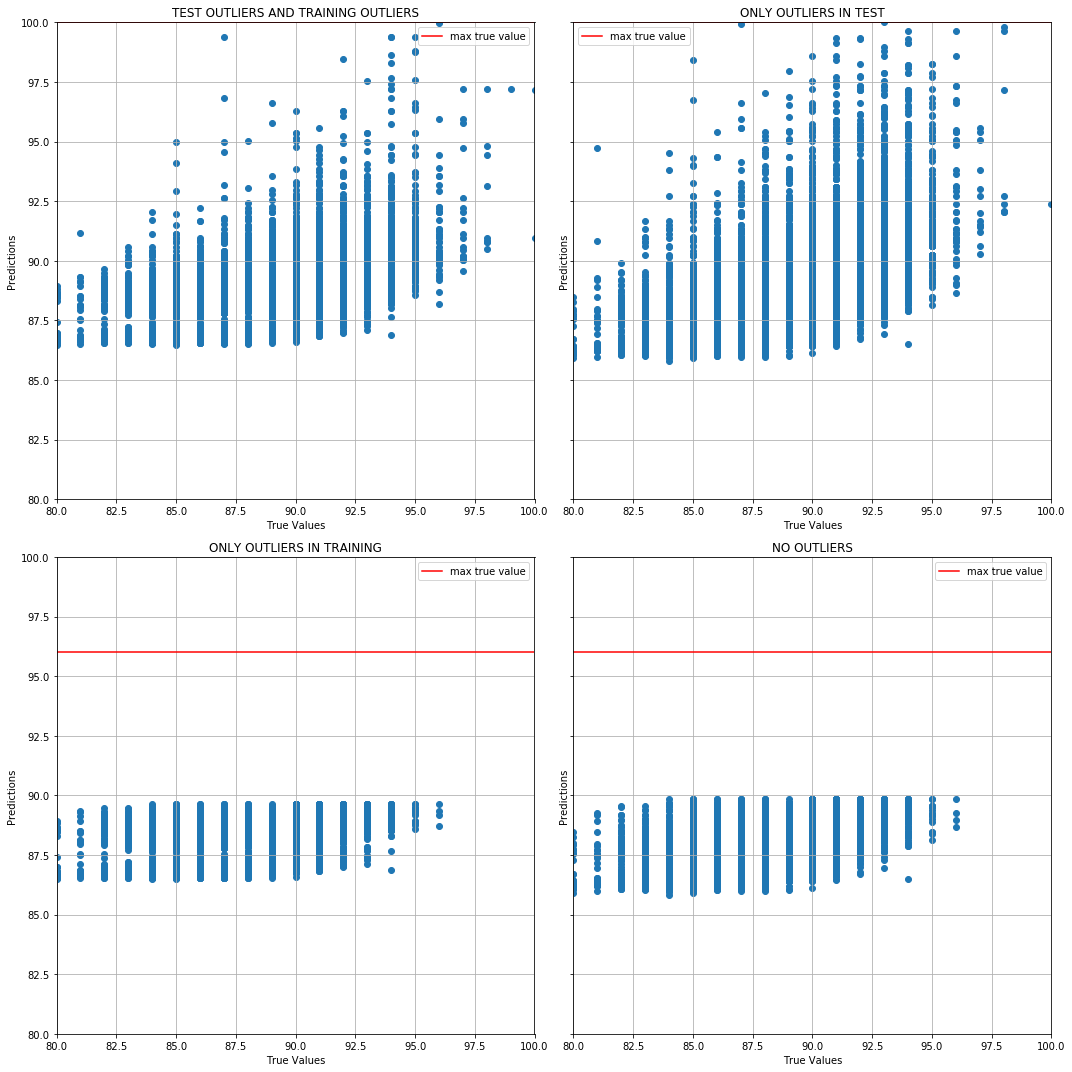

In [104]:
f, ((ax3, ax4), (ax1, ax2)) = plt.subplots(2, 2, sharey=True, figsize=(15,15))

# Dirty test outliers
print("************OUTLIERS IN TEST DATA **************")
# plot w/ outliers in training data
ax3.scatter(ax3_y_test, ax3_y_predictions)
ax3.set(xlabel='True Values', ylabel='Predictions')

max_y_predictions = int(max(ax3_y_predictions))
min_y_predictions = int(min(ax3_y_predictions))

print("--> TEST OUTLIERS AND TRAINING OUTLIERS")
print('max_y_predictions: ', max_y_predictions)
print('min_y_predictions: ', min_y_predictions)
print('MAE:', mae_3)
print()

max_y_true = int(max(ax3_y_test.points))
min_y_true = int(min(ax3_y_test.points))

ax3.axhline(max_y_true,label='max true value', color="red")

ax3.legend()
ax3.grid()
ax3.set_xlim([80,100])
ax3.set_ylim([80,100])
ax3.set_title('TEST OUTLIERS AND TRAINING OUTLIERS')

# plot w/o outliers in training data
ax4.scatter(ax4_y_test, ax4_y_predictions)
ax4.set(xlabel='True Values', ylabel='Predictions')

max_y_predictions = int(max(ax4_y_predictions))
min_y_predictions = int(min(ax4_y_predictions))

print("--> ONLY OUTLIERS IN TEST")
print('max_y_predictions: ', max_y_predictions)
print('min_y_predictions: ', min_y_predictions)
print('MAE:', mae_4)

max_y_true = int(max(ax4_y_test.points))
min_y_true = int(min(ax4_y_test.points))

ax4.axhline(max_y_true,label='max true value', color="red")

ax4.legend()
ax4.grid()
ax4.set_xlim([80,100])
ax4.set_ylim([80,100])
ax4.set_title('ONLY OUTLIERS IN TEST')

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

print()

# Clean test
print("************CLEAN TEST DATA**************")
# plot w/ outliers in training data
ax1.scatter(ax1_y_test, ax1_y_predictions)
ax1.set(xlabel='True Values', ylabel='Predictions')

max_y_predictions = int(max(ax1_y_predictions))
min_y_predictions = int(min(ax1_y_predictions))

print("--> ONLY OUTLIERS IN TRAINING:")
print('max_y_predictions: ', max_y_predictions)
print('min_y_predictions: ', min_y_predictions)
print('MAE:', mae_1)
print()

max_y_true = int(max(ax1_y_test.points))
min_y_true = int(min(ax1_y_test.points))

ax1.axhline(max_y_true,label='max true value', color="red")

ax1.legend()
ax1.grid()
ax1.set_xlim([80,100])
ax1.set_ylim([80,100])
ax1.set_title('ONLY OUTLIERS IN TRAINING')

# plot w/o outliers in training data
ax2.scatter(ax2_y_test, ax2_y_predictions)
ax2.set(xlabel='True Values', ylabel='Predictions')

max_y_predictions = int(max(ax2_y_predictions))
min_y_predictions = int(min(ax2_y_predictions))

print("--> NO OUTLIERS:")
print('max_y_predictions: ', max_y_predictions)
print('min_y_predictions: ', min_y_predictions)
print('MAE:', mae_2)

max_y_true = int(max(ax2_y_test.points))
min_y_true = int(min(ax2_y_test.points))

ax2.axhline(max_y_true,label='max true value', color="red")

ax2.legend()
ax2.grid()
ax2.set_xlim([80,100])
ax2.set_ylim([80,100])
ax2.set_title('NO OUTLIERS')

plt.tight_layout()

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)



<h1>Information gain</h1>

In [90]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.25*median')
embeded_rf_selector.fit(X_train, y_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

/Users/roxana/.virtualenvs/dojo3/lib/python3.7/site-packages/sklearn/feature_selection/from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


3 selected features
['price', 'from_Italy', 'from_US']


<h3>Regression with only best features</h3>

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
coeficient:  [[0.03801242 0.29012211 0.88502523]]
intercept:  [87.07831531]
Accuracy: 0.1794213332646234
RMSE: 2.7026983290081006
MAE: 2.0836147707460415


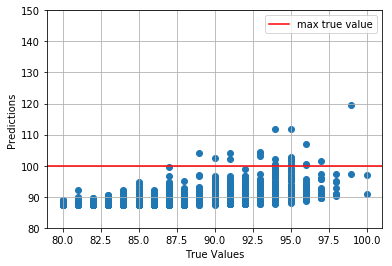

In [91]:
# pd.concat([X_train, y_train], axis=1)
# # selected_features_X_train = pd.concat(X_train.price.values, X_train.from_Italy.values)
print(type(X_train))
print(type(y_train))
selected_features_X_train = X_train[['price','from_Italy', 'from_US']]
selected_features_X_test = X_test[['price','from_Italy', 'from_US']]
print(type(selected_features_X_train))


# apply linear regression again
lm = linear_model.LinearRegression()
model = lm.fit(selected_features_X_train, y_train)
y_predictions = lm.predict(selected_features_X_test)

w = model.coef_ # parameters of model
b = model.intercept_ #intercept of model

print("coeficient: ", w)
print("intercept: ", b)

# Plot the results
plt.scatter(y_test, y_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
max_y_predictions = int(max(y_predictions))
min_y_predictions = int(min(y_predictions))
max_y_true = int(max(y_test.points))
min_y_true = int(min(y_test.points))
plt.axhline(max_y_true,label='max true value', color="red")
plt.legend()
plt.grid()
plt.ylim([80,150])

# Accuracy score
print ('Accuracy:', model.score(selected_features_X_test, y_test))
# Root mean squared error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predictions)))
# Mean absolute error (MAE)
print('MAE:', metrics.mean_absolute_error(y_test, y_predictions))
